In [2]:
import numpy as np
import h5py
import matplotlib as mpl
from matplotlib import pyplot as plt
import functions as fn
import box
import my_rc_params

In [3]:
boxes = np.array([])
zoom_path = fn.ZOOMS_PATH/'c112_MDRInt'
is_verbose = True
n = 5

In [4]:
for shot in range(int(fn.ZHOT[3]), int(fn.ZHOT[0])+1):
    boxes = np.append(boxes, box.Box(zoom_path, str(shot).zfill(3)))
    
    if is_verbose:
        print(f'z = {round(boxes[-1].z,2)}')

    snap_path = zoom_path/f'snap_{str(shot).zfill(3)}.hdf5'
    with h5py.File(snap_path) as snap:
        #print(np.array(snap.get('PartType5/BH_Mass')))
        boxes[-1].mass_bh = np.array(snap.get('PartType5/BH_Mass'))

    if is_verbose:
        print(f'M_BH_max = {round(np.sort(boxes[-1].mass_bh*1e10)[-1],2)} h^-1 M_Sun')

z = 3.01
M_BH_max = 17862992.0 h^-1 M_Sun
z = 2.95
M_BH_max = 17961534.0 h^-1 M_Sun
z = 2.9
M_BH_max = 17988126.0 h^-1 M_Sun
z = 2.86
M_BH_max = 17988534.0 h^-1 M_Sun
z = 2.8
M_BH_max = 17992152.0 h^-1 M_Sun
z = 2.75
M_BH_max = 19700066.0 h^-1 M_Sun
z = 2.7
M_BH_max = 19700346.0 h^-1 M_Sun
z = 2.65
M_BH_max = 20610238.0 h^-1 M_Sun
z = 2.59
M_BH_max = 20649578.0 h^-1 M_Sun
z = 2.54
M_BH_max = 21199714.0 h^-1 M_Sun
z = 2.49
M_BH_max = 26557748.0 h^-1 M_Sun
z = 2.44
M_BH_max = 36744960.0 h^-1 M_Sun
z = 2.4
M_BH_max = 37037944.0 h^-1 M_Sun
z = 2.35
M_BH_max = 37042120.0 h^-1 M_Sun
z = 2.3
M_BH_max = 39090812.0 h^-1 M_Sun
z = 2.25
M_BH_max = 39491704.0 h^-1 M_Sun
z = 2.19
M_BH_max = 46682520.0 h^-1 M_Sun
z = 2.15
M_BH_max = 53020748.0 h^-1 M_Sun
z = 2.1
M_BH_max = 66309236.0 h^-1 M_Sun
z = 2.05
M_BH_max = 68594128.0 h^-1 M_Sun
z = 2.0
M_BH_max = 68701304.0 h^-1 M_Sun
z = 1.95
M_BH_max = 71993576.0 h^-1 M_Sun
z = 1.9
M_BH_max = 76531848.0 h^-1 M_Sun
z = 1.85
M_BH_max = 76586528.0 h^-1 M_Sun


In [5]:
z = np.array([box.z for box in boxes])
masses_bh = np.array([])

masses_bh = np.array([np.sort(box.mass_bh)[-n:] for box in boxes])


/tmp/ipykernel_255132/710256670.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cax, ticks=c, orientation='vertical', label='Mass Order', pad=0)


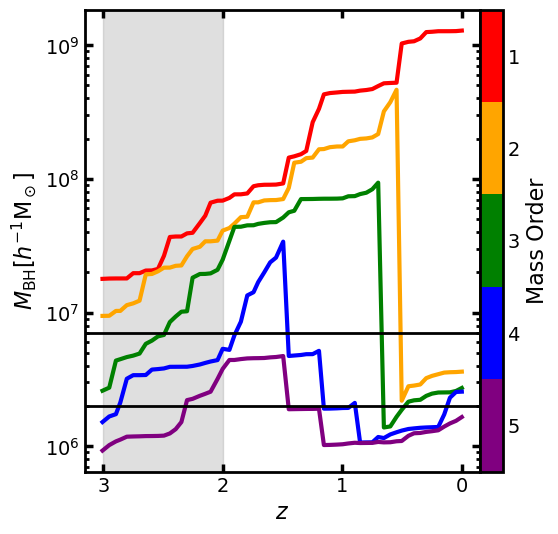

In [6]:
fg, ax = plt.subplots()
cmaplist = ['r', 'orange', 'g', 'b', 'purple']
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist[::-1], n)
c = np.arange(1, n+1)
cax = ax.scatter(c, c, c=c, cmap=cmap)
ax.cla()

ax.semilogy()
ax.invert_xaxis()
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$M_\mathrm{BH} [h^{-1} \mathrm{M}_\odot]$')

for i in range(0, n):
    ax.plot(z, masses_bh[:,n-1-i]*1e10, lw=3, c=cmap(4-i), label=i+1)
#ax.legend(title='Mass Order', loc='upper center')

ndx = np.where((z ))
xlim = ax.get_xlim()
ax.hlines([2e6, 7e6], xlim[0], xlim[1], lw=2, colors='k')
ax.set_xlim(xlim)

ax.axvspan(3, 2, alpha=0.25, color='gray')

cbar = plt.colorbar(cax, ticks=c, orientation='vertical', label='Mass Order', pad=0)
tick_locs = (np.arange(n)+1.75)*(n-1)/(n)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(np.arange(1,n+1)[::-1])
cbar.ax.tick_params(size=0)

#cbar.ax.set_xlim(0.5, n+0.5)
#cbar.ax.set_xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
#cbar.vmin = 0.5
#cbar.vmax = n+0.5
#ax.clim(0.5, n+0.5)
fg.savefig(fn.HERE_PATH/f'BH_Masses_n{n}.pdf', bbox_inches='tight')


In [7]:
print(tick_locs)

[1.4 2.2 3.  3.8 4.6]


plt.plot()